Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [3]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [4]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [5]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [6]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [7]:
neighbourhoods.shape

(563, 4)

Read borough_CLustering_05 csvfile

In [8]:

bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

In [9]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]

In [10]:
London_neig_grouped=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv', index_col=0)

In [11]:
London_neig_grouped.head()

,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.50,0.00
1,Acton,0.0,0.0,0.0,0.0,0.20,0.00,0.10,0.30,0.40
2,Addington,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.25,0.50
3,Addiscombe,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00
4,Albany Park,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.25,0.25


In [12]:
bc051=pd.DataFrame(bc05['4'][0],columns=['Borough'])

In [13]:
pp=neighbourhoods.loc[neighbourhoods['Borough'].isin(bc051['Borough'].values)]['Neighbourhood']

In [14]:
London_neig_grouped_mean=London_neig_grouped.loc[London_neig_grouped['Neighbourhood'].isin(pp.values)]

Let's print each neighbourhood with the 5 most common venues

In [15]:
London_neig_grouped_mean.shape

(51, 10)

In [16]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Arkley----
                venue  freq
0      parks_outdoors   1.0
1  arts_entertainment   0.0
2            building   0.0
3           education   0.0
4               event   0.0


----Barnet (also Chipping Barnet, High Barnet)----
                venue  freq
0           nightlife  0.50
1            building  0.25
2              travel  0.25
3  arts_entertainment  0.00
4           education  0.00


----Barnet Gate----
                venue  freq
0  arts_entertainment  0.33
1           nightlife  0.33
2      parks_outdoors  0.33
3            building  0.00
4           education  0.00


----Brent Cross----
                venue  freq
0               shops  0.54
1                food  0.40
2      parks_outdoors  0.04
3            building  0.02
4  arts_entertainment  0.00


----Brentford----
            venue  freq
0            food  0.50
1       nightlife  0.19
2           shops  0.15
3  parks_outdoors  0.08
4          travel  0.08


----Brunswick Park----
                venue  freq

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [17]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [18]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Arkley,parks_outdoors,travel,shops,nightlife,food
23,"Barnet (also Chipping Barnet, High Barnet)",nightlife,travel,building,shops,parks_outdoors
24,Barnet Gate,parks_outdoors,nightlife,arts_entertainment,travel,shops
57,Brent Cross,shops,food,parks_outdoors,building,travel
59,Brentford,food,nightlife,shops,travel,parks_outdoors


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [19]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [20]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
14,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
23,0.000000,0.250000,0.0000,0.0,0.000000,0.500000,0.000000,0.000000,0.250000
24,0.333333,0.000000,0.0000,0.0,0.000000,0.333333,0.333333,0.000000,0.000000
57,0.000000,0.020833,0.0000,0.0,0.395833,0.000000,0.041667,0.541667,0.000000
59,0.000000,0.000000,0.0000,0.0,0.500000,0.192308,0.076923,0.153846,0.076923
67,0.000000,0.000000,0.0000,0.0,0.333333,0.000000,0.333333,0.000000,0.333333
69,0.000000,0.000000,0.0000,0.0,0.666667,0.000000,0.000000,0.333333,0.000000
70,0.000000,0.062500,0.0625,0.0,0.562500,0.062500,0.062500,0.125000,0.062500
91,0.000000,0.000000,0.0000,0.0,0.500000,0.000000,0.000000,0.333333,0.166667
96,0.017544,0.000000,0.0000,0.0,0.526316,0.105263,0.087719,0.228070,0.035088


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [21]:
SSD = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

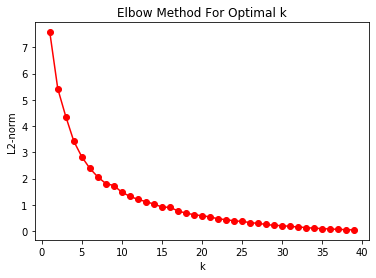

0.04693697008679525

In [22]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [23]:
elbow_N055=np.empty([39,2])
elbow_N055=pd.DataFrame(elbow_N055,columns=['K','SSD'])
elbow_N055['K']=K
elbow_N055['SSD']=SSD
elbow_N055.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N055.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 5

In [25]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([4, 2, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 3, 3, 2, 1, 1, 0, 2, 1, 3, 3, 2, 0, 1, 3, 3, 1, 1,
       1, 0, 2, 0, 3, 3, 1], dtype=int32)

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [27]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N055=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N055=kclusters_N055.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,Brent Cross,51.5770,-0.2190,0,shops,food,parks_outdoors,building,travel
55,Hounslow,Hounslow,51.4668,-0.3750,0,shops,food,travel,nightlife,parks_outdoors
36,Barnet,New Southgate,51.6136,-0.1419,0,shops,food,building,travel,parks_outdoors
31,Barnet,West Hendon,51.5780,-0.2400,0,travel,shops,food,parks_outdoors,nightlife
23,Barnet,Grahame Park,51.6001,-0.2419,0,food,shops,arts_entertainment,parks_outdoors,nightlife


Finally, let's visualize the resulting clusters

In [29]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=50)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.2).add_to(map_clusters)
       
map_clusters


In [30]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_bc05_CLUSTER_05.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [31]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [32]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,Brent Cross,51.577000,-0.219000,0,shops,food,parks_outdoors,building,travel
55,Hounslow,Hounslow,51.466800,-0.375000,0,shops,food,travel,nightlife,parks_outdoors
36,Barnet,New Southgate,51.613600,-0.141900,0,shops,food,building,travel,parks_outdoors
31,Barnet,West Hendon,51.578000,-0.240000,0,travel,shops,food,parks_outdoors,nightlife
23,Barnet,Grahame Park,51.600100,-0.241900,0,food,shops,arts_entertainment,parks_outdoors,nightlife
19,Barnet,Friern Barnet,51.612848,-0.158614,0,shops,food,travel,parks_outdoors,nightlife
17,Barnet,The Hyde,51.582200,-0.247800,0,shops,food,travel,nightlife,parks_outdoors
57,Hounslow,Feltham,51.449600,-0.408900,0,shops,travel,food,arts_entertainment,parks_outdoors
1,Barnet,Colney Hatch,51.610540,-0.155750,0,shops,food,parks_outdoors,building,travel
4,Barnet,Colindale,51.593000,-0.247900,0,shops,food,parks_outdoors,building,travel


In [33]:
 print ('CLuster 2: ')

CLuster 2: 


In [34]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Barnet,Church End,51.601117,-0.191890,1,food,shops,nightlife,travel,parks_outdoors
34,Brent,Cricklewood,51.554800,-0.217600,1,food,shops,travel,nightlife,parks_outdoors
35,Camden,Cricklewood,51.554800,-0.217600,1,food,shops,travel,nightlife,parks_outdoors
39,Barnet,Hendon,51.583700,-0.225200,1,food,travel,shops,parks_outdoors,nightlife
40,Ealing,Chiswick,51.492500,-0.263300,1,food,shops,nightlife,parks_outdoors,travel
41,Hammersmith and Fulham,Chiswick,51.492500,-0.263300,1,food,shops,nightlife,parks_outdoors,travel
42,Hounslow,Chiswick,51.492500,-0.263300,1,food,shops,nightlife,parks_outdoors,travel
43,Hounslow,Gunnersbury,51.492700,-0.277700,1,food,travel,shops,parks_outdoors,nightlife
44,Hounslow,Osterley,51.484800,-0.350000,1,travel,food,shops,parks_outdoors,nightlife
46,Hounslow,Cranford,51.476600,-0.407900,1,food,travel,shops,parks_outdoors,nightlife


In [35]:
print ('Cluster 3: ')

Cluster 3: 


In [36]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Barnet,"Barnet (also Chipping Barnet, High Barnet)",51.648784,-0.172913,2,nightlife,travel,building,shops,parks_outdoors
53,Hounslow,Hatton,51.467800,-0.422600,2,travel,shops,nightlife,food,building
7,Barnet,Totteridge,51.633133,-0.200864,2,travel,nightlife,building,shops,parks_outdoors
16,Barnet,New Barnet,51.648784,-0.172913,2,nightlife,travel,building,shops,parks_outdoors
51,Hounslow,Isleworth,51.466000,-0.336000,2,travel,nightlife,food,building,shops


In [37]:
print('Cluster 4: ')

Cluster 4: 


In [38]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
54,Hounslow,Woodlands,51.469568,-0.337465,3,nightlife,food,parks_outdoors,travel,shops
29,Barnet,Oakleigh Park,51.626000,-0.171600,3,food,parks_outdoors,nightlife,travel,shops
15,Barnet,Monken Hadley,51.662400,-0.199000,3,shops,parks_outdoors,nightlife,food,travel
45,Hounslow,Hanworth,51.431000,-0.381000,3,parks_outdoors,food,shops,nightlife,building
38,Barnet,Whetstone,51.626000,-0.171500,3,parks_outdoors,food,nightlife,travel,shops
37,Barnet,Barnet Gate,51.641827,-0.242985,3,parks_outdoors,nightlife,arts_entertainment,travel,shops
27,Barnet,Osidge,51.634500,-0.142300,3,shops,parks_outdoors,nightlife,food,travel
30,Barnet,Brunswick Park,51.626000,-0.148000,3,travel,parks_outdoors,food,shops,nightlife
14,Barnet,Mill Hill,51.620000,-0.230000,3,shops,parks_outdoors,nightlife,food,travel
32,Barnet,Hampstead Garden Suburb,51.583000,-0.185000,3,shops,parks_outdoors,food,travel,nightlife


In [39]:
print('Cluster 5:')

Cluster 5:


In [40]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
26,Barnet,Arkley,51.6477,-0.2311,4,parks_outdoors,travel,shops,nightlife,food


In [41]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N055=np.empty([kclusters,2])                                         
Centroids_N055=pd.DataFrame(Centroids_N055, columns=['x-Latitude','y-Longitude']) 
Centroids_N055['x-Latitude']=x
Centroids_N055['y-Longitude']=y
Centroids_N055.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N055.xlsx')

In [42]:
Centroids_N055

,x-Latitude,y-Longitude
0,51.575153,-0.236342
1,51.552117,-0.255161
2,51.572900,-0.261058
3,51.592029,-0.220885
4,51.647700,-0.231100


In [43]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4
arts_entertainment,0,0,0,0,0
building,0,0,0,0,0
education,0,0,0,0,0
event,0,0,0,0,0
food,1,30,0,1,0
nightlife,0,0,2,1,0
parks_outdoors,0,0,0,3,1
shops,9,0,0,4,0
travel,1,1,3,1,0


In [44]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N055=kclusters_N055.append(p_score)

In [45]:
kclusters_N055.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N055.xlsx')
kclusters_N055

0    11.000000
1    24.000000
2     5.000000
3    10.000000
4     1.000000
5     0.294769
6     0.810345
dtype: float64